Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [12]:
NICKNAME = "DanilPeg"

---

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
plt.style.use('ggplot')
%matplotlib notebook

# Метод Монте-Карло в физике

Методами Монте-Карло называют множество различных методов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
plt.style.use('ggplot')

## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$$
V_d = \frac{\pi^{d/2}} {\Gamma(1 + d/2)}
$$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [15]:
def getSphereVolumeExact(D, R = 1.0):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R рекуррентным методом

    --------
    Аргументы:
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    V = 1
    for n in range(D):
        q = 1 + n / 2
        V = V * np.pi**0.5 * R * sp.gamma(q)/sp.gamma(q+1/2)
    return V

1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

In [16]:
getSphereVolumeExact(1) # = 2R

2.0

In [17]:
getSphereVolumeExact(2) # = окружность

3.1415926535897927

In [18]:
getSphereVolumeExact(3) # = сфера

4.18879020478639

<IPython.core.display.Javascript object>


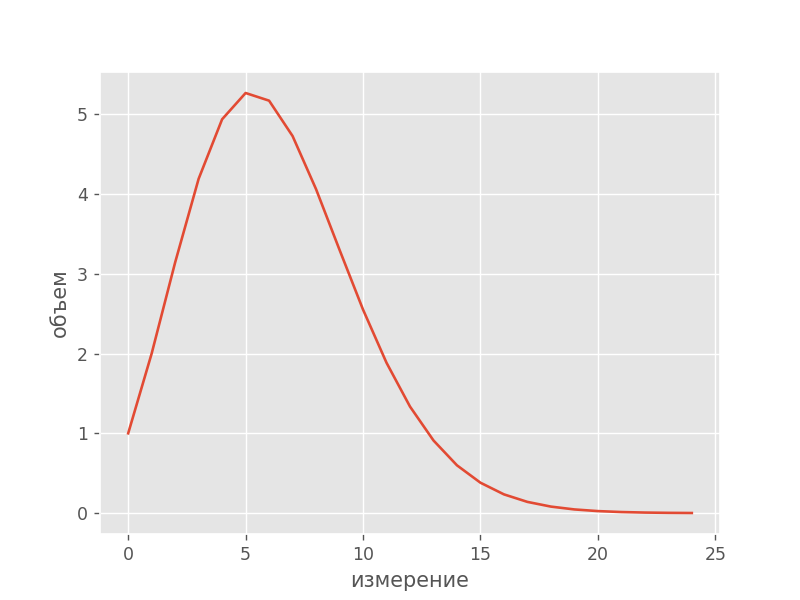

Text(0, 0.5, 'объем')

In [20]:
N = 25
vol = [getSphereVolumeExact(d) for d in range(N)]
plt.figure()
plt.plot(np.arange(N), vol)
plt.xlabel("измерение")
plt.ylabel("объем")

### Задание 1.2
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

In [21]:
def getSphereVolumePseudorandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R методом Монте-Кало на псевдослучайных числах

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    V = (2 * R) ** D 
    q = np.random.uniform(low=-R, high=R, size=(N,D)) 
    in_ = 0
    for i in range(N):
        if np.linalg.norm(q[i,:]) <= R: 
            in_ += 1
    V = V * in_ / N
    return V

In [22]:
getSphereVolumePseudorandom(1000000, 2, R = 1)

3.140932

Постройте график зависимости относительной точности $\epsilon$ которая достигается при фиксированном $N$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$.

<IPython.core.display.Javascript object>


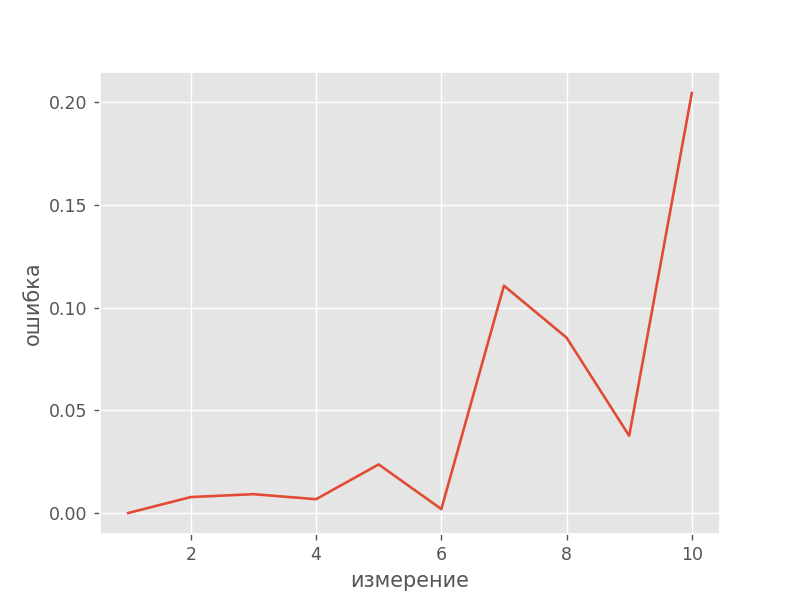

Text(0, 0.5, 'ошибка')

In [29]:
def eps(N, D):
    V = getSphereVolumeExact(D, R = 1.0)
    Vr = getSphereVolumePseudorandom(N, D, R = 1)
    return (V - Vr) / V
N = 10000
Dim = 10 
epsilon = [abs(eps(N,d)) for d in range(1, Dim + 1)]
plt.plot(range(1, Dim + 1), epsilon)
plt.xlabel("измерение")
plt.ylabel("ошибка")

### Задание 1.3
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq`:


выполните `pip install sobol_seq` в Jupyter или

выполните команду `pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


In [30]:
!pip install sobol_seq
import sobol_seq


Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [31]:
sobol_seq.i4_sobol_generate?

In [32]:
def getSphereVolumeQuasirandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R методом Монте-Кало на квазислучайных числах

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    V = (2 * R) ** D 
    k = sobol_seq.i4_sobol_generate(D,N) 
    
    in_ = 0
    for i in range(N):
        if np.linalg.norm(k[i,:]) <= R: 
            in_ += 1
    V = V * in_/ N
    return V
    return V


Сравните точность вычисления объема для квазислучайной и псевдослучайной последовательностей, рассчитав  $\epsilon(D)$, при таком же значении $N$, как в предыдущем задании. Постройте обе зависимости $\epsilon(D)$ на одном графике в логарифмической шкале по $\epsilon$.

<IPython.core.display.Javascript object>


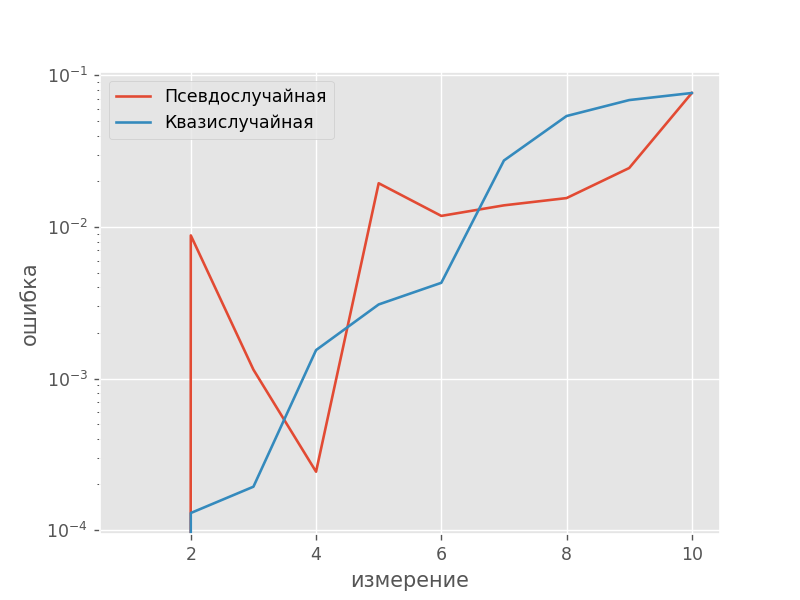

In [33]:
def epsSobol(N, D):
    V = getSphereVolumeExact(D, R = 1.0)
    Vr = getSphereVolumeQuasirandom(N, D, R = 1)
    return (V - Vr) / V
N = 10000
D = 10 
epsilon = [abs(eps(N,d)) for d in range(1, D + 1)]
epsilonSobol = [abs(epsSobol(N,d)) for d in range(1, D + 1)]
plt.plot(range(1, D+1), epsilon, label="Псевдослучайная")
plt.plot(range(1, D+1), epsilonSobol, label="Квазислучайная")
plt.xlabel("измерение")
plt.ylabel("ошибка")
plt.yscale("log")
plt.legend()

Сделайте вывды о работе псевдослучайной и квазислучайной последовательностях. 

Квазислучайные последовательности действуют точнее, чем псевдослучайные - равномернее заметают требуемую площадь.

# Задание 2

## Задание 2.1
Вычислите значение интеграла 
$$
\int d^d\mathbf{r} \frac{e^{-\mathbf{r}^T\mathbf{r}}}{1 + \mathbf{r}^T\mathbf{r}}, \;\mathbf{r} = (r_1, r_2, ..., r_d)
$$
по всему пространству, используя генерацию случайной величины с гауссовой плотностью.
Проведите результаты для $d=1,2,3,4,5$, используя разумной количество точек.
Для $d=1,2$ сравните с ответом, полученным \textit{любым} другим способом.

In [62]:
import scipy.special as sp, scipy.integrate
from scipy import integrate
def denumerator(r):
    return 1 / (1 + (r ** 2).sum())
F1 = lambda x: np.e ** (-x ** 2) / (1 + x ** 2)
F2 = lambda x, y: np.e ** (-x ** 2 - y ** 2) / (1 + x ** 2 + y ** 2)
N = 40000
for d in [1, 2, 3, 4, 5]:
    p_ =  np.random.normal(0, 1 / np.sqrt(2), size=(N, d))
    res = np.pi ** (d / 2) * np.array([denumerator(p) for p in p_]).sum() / N
    print(f'd = {d}: I = {res}')

print(integrate.quad(F1, -np.inf, np.inf)[0]) # d = 1
print(integrate.dblquad(F2, -np.inf, np.inf, -np.inf, np.inf)[0]) # d = 2



d = 1: I = 1.3440542336346808
d = 2: I = 1.8742730714593152
d = 3: I = 2.694534702689707
d = 4: I = 3.98223451939351
d = 5: I = 6.015825864317557
1.3432934216467354
1.873480492462358


## Задание 2.2
Реализуйте функцию, возвращающую выборку случайной величины с плотностью $\omega(x) \propto \sqrt{1-x^2}, x\in[-1,1]$, используя rejection method.

In [34]:
import matplotlib.pyplot as plt
def getSample(N):
    """
    Функция возвращает выборку случайных величин с распределнием ~sqrt(1-x^2) 

    --------
    Аргументы:
    N - int, количество случайных точек
    --------
    Функция возвращает:
    sample - numpy ndarray of float, массив случайных величин размера N
    """
    density = lambda x: np.sqrt(1 - x ** 2)
    sample, counter = [], 0
    while counter < N:
        x = np.random.uniform(-1,1)
        y = np.random.uniform(0,1)
        if y < density(x):
            sample.append(x)
            counter += 1
    return sample

Проверьте правильность, сгенерировав достаточно большой sample, и построив гистограмму.

<IPython.core.display.Javascript object>


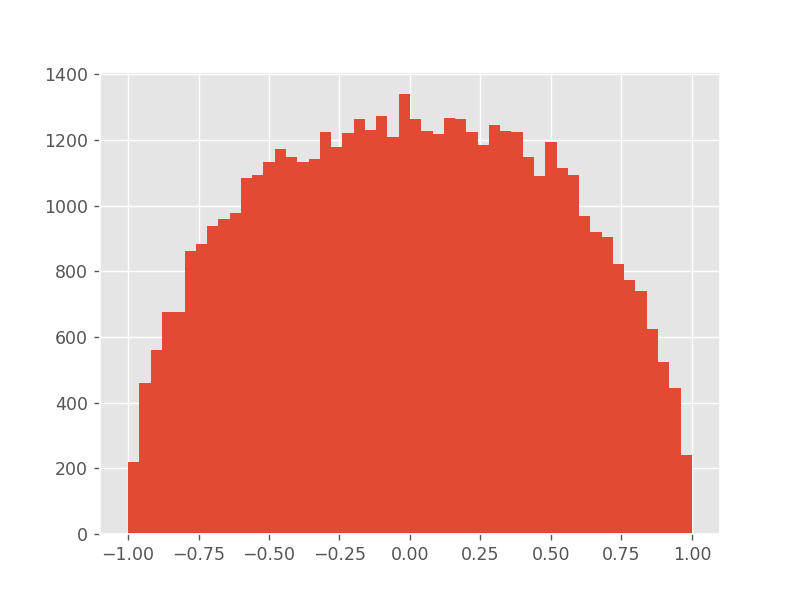

In [35]:
plt.hist(getSample(50000), 50)
plt.show()

# Задание 3

Рассмотрим решетку $n\times n$, в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$
E_i = -J \sigma_i \sigma_j
$$
Тогда энергия каждой ячейки 
$$
E_i = -J \sigma_i \sum_j \sigma_j
$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние, когда все спины одинаково ориентированы. Однако при ненулевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблематичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):
1. Задаем случайное начальное состояние
2. Выбираем случайную ячейку
3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.
4. Если изменение энергии отрицательное, оставляем спин перевернутым
5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью $\exp(-\delta E/kT)$
6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [37]:
def getInitialState(N):
    '''
    Функция задает случайное начальное состояние
    ---------
    Аргументы:
    N - int, линейный размер решетки 
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    '''
    state = -2 * np.random.randint(2, size=(N,N)) + 1
    return state

2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


In [36]:
def getDeltaE(i, j, state):
    '''
    Функция расчитывает и возвращает изменение энергии ячейки (i,j) в случае ее переворота (не меняя состояния state)
    
    ---------
    Аргументы:
    i - int, адресс ячейки вдоль оси 0
    j - int, адресс ячейки вдоль оси 1
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    dE - float, изменение энергии
    '''
    state13 = np.hstack((state,state,state))
    state33 = np.vstack((state13,state13,state13))
    N = state.shape[0]
    dE = 2 * state33[i + N, j + N] * np.sum([state33[i + N + 1, j + N], state33[i + N - 1, j + N], state33[i + N, j + N + 1], state33[i + N, j + N - 1]])
    return dE

3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. 

In [38]:
def makeFlip(T, state):
    '''
    Функция N^2 раз переворачивает спин, и принимает решение оставить его перевернутым или нет, согласно правилам 4. и 5.
    
    ---------
    Аргументы:
    T - float, положительное число, безразмерный коэфициент, характеризующий температуру, равный kT/J
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив нового состояния системы размера NxN
    '''
    N = state.shape[0]
    for count in range(N * N):
        i = np.random.randint(0, high=N)
        j = np.random.randint(0, high=N)
        dE = getDeltaE(i, j, state)
        if dE < 0:
            state[i,j] *= -1
        else:
            if np.random.sample() < np.exp(-dE / T):
                state[i,j] *= -1
    return state

4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

In [39]:
def getEnergy(state):
    '''
    Функция, рассчитывает значение энергии всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    E - float, значение энергии системы
    '''
    state13 = np.hstack((state,state,state))
    state33 = np.vstack((state13,state13,state13))
    
    N = state.shape[0]
    E = 0
    for i in range(N, 2 * N):
        for j in range(N, 2 * N):
            E += - state33[i,j] * np.sum([state33[i + 1, j], state33[i - 1, j], state33[i, j + 1], state33[i, j - 1]])
    return E

5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [40]:
def getMagnetization(state):    
    '''
    Функция, рассчитывает значение намагниченности всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    M - float, значение намагниченности системы
    '''
    N = state.shape[0]
    M = 0
    for i in range(N):
        for j in range(N):
            M += state[i, j]
    return M

В следующей ячейке кода зададим начальные параметры: 

**Nt** - количество точек по температуре, 

**N** - линейный размер решетки, 

**eqStep** - количество попыток переворота спина, в течение которых система приводится к равновесному сосотоянию. Обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,

**steps** - количество попыток переворота спина, в течение которых рассчитывается значения энергии и намагниченности (нужно для усреднения расчитанных значений по ансамблю состояний, близких к равновесному)

In [41]:
N       = 10         # размер решетки NxN
Nt      = 10         # количество точек температуры
eqSteps = 150        # количество раз выполнения makeFlip для установления равновесия
steps   = 30         # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.5, 5, Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

<IPython.core.display.Javascript object>


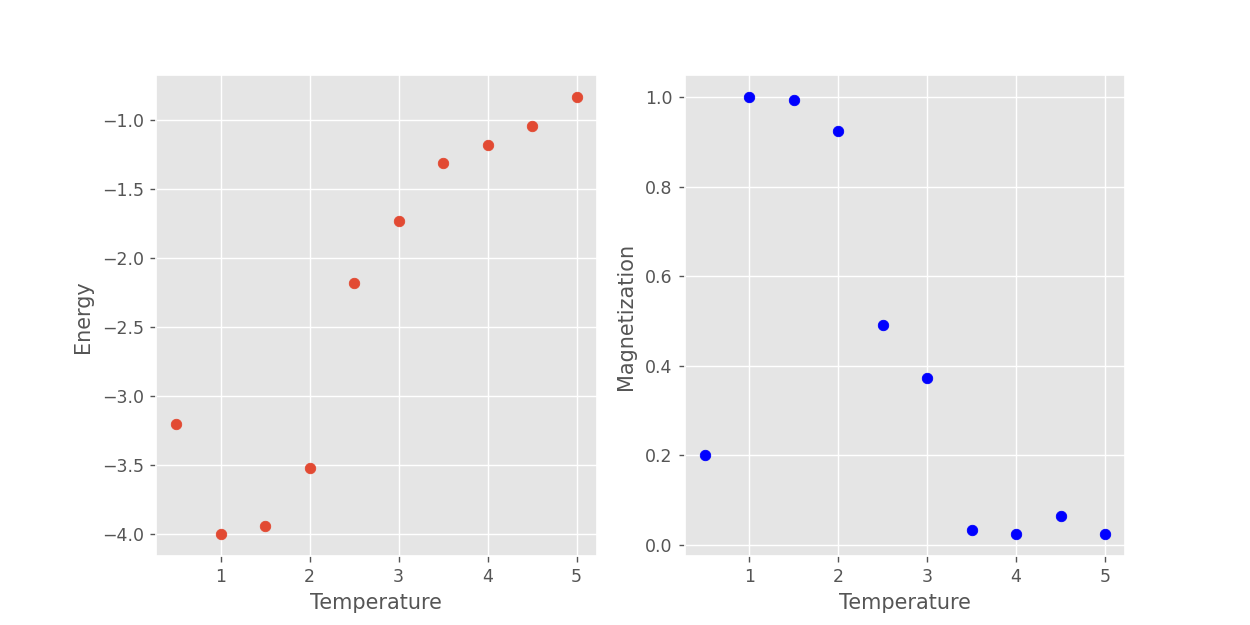

In [42]:
for t in range(Nt):
    print("Complete", t/Nt*100, '%\r', end='')
    
    Esum = Msum = 0
    state = getInitialState(N)
    
    for i in range(eqSteps):         # установление статистического равновесия
        makeFlip(T[t], state)          

    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        makeFlip(T[t], state)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)

print("Done              \r", end='')

_, ax = plt.subplots(1,2,figsize=(10, 5));

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature");
ax[0].set_ylabel("Energy ");

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature"); 
ax[1].set_ylabel("Magnetization ");

Интерпретируйте с точки зрения физики полученные графики. Описывают ли они поведение ферромагнетиков и фазовые переходы?

Из теории знаем, что магнитные свойства зависият от температуры. На данных графиках ситуация близка к фазовым переходам второго рода на примере перехода ферромагнетиков в парамгнетики - повышается температура, ферромагнетик теряет намагниченность (в отсутствие внешнего поля). Формально - при повышении температуры спины ведут себя более хаотично, энергия и намагниченность стремятся к нулю.

Задайте новое сосотояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое

In [45]:
N = 64
state = getInitialState(N)

In [46]:
def neg(N, state):
    J, I = [], []
    for i in range(N):
        for j in range(N):
            if state[i,j] == -1:
                I.append(i)
                J.append(j)
    return I, J

In [47]:
def pos(N, state):
    J, I = [], []
    for i in range(N):
        for j in range(N):
            if state[i,j] == 1:
                I.append(i)
                J.append(j)
    return I, J

<IPython.core.display.Javascript object>


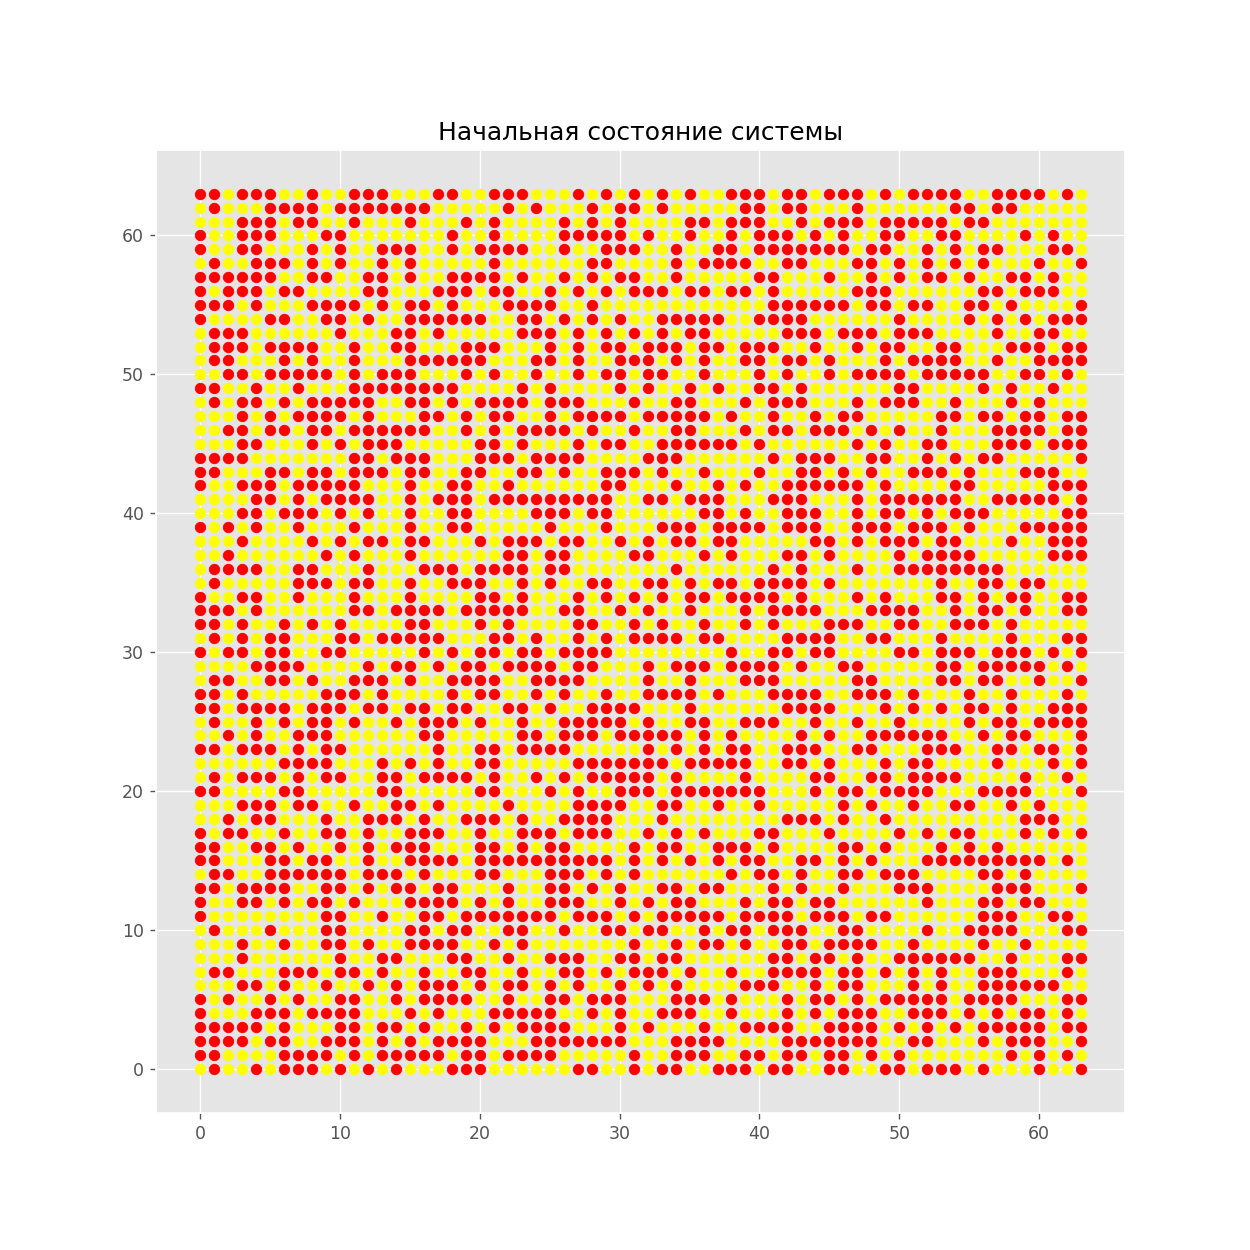

Text(0.5, 1.0, 'Начальная состояние системы')

In [48]:
plt.figure(figsize=(10,10))
plt.scatter(pos(N, state)[0], pos(N, state)[1], color ='yellow')
plt.scatter(neg(N, state)[0], neg(N, state)[1], c="red")
plt.title("Начальная состояние системы")

<IPython.core.display.Javascript object>


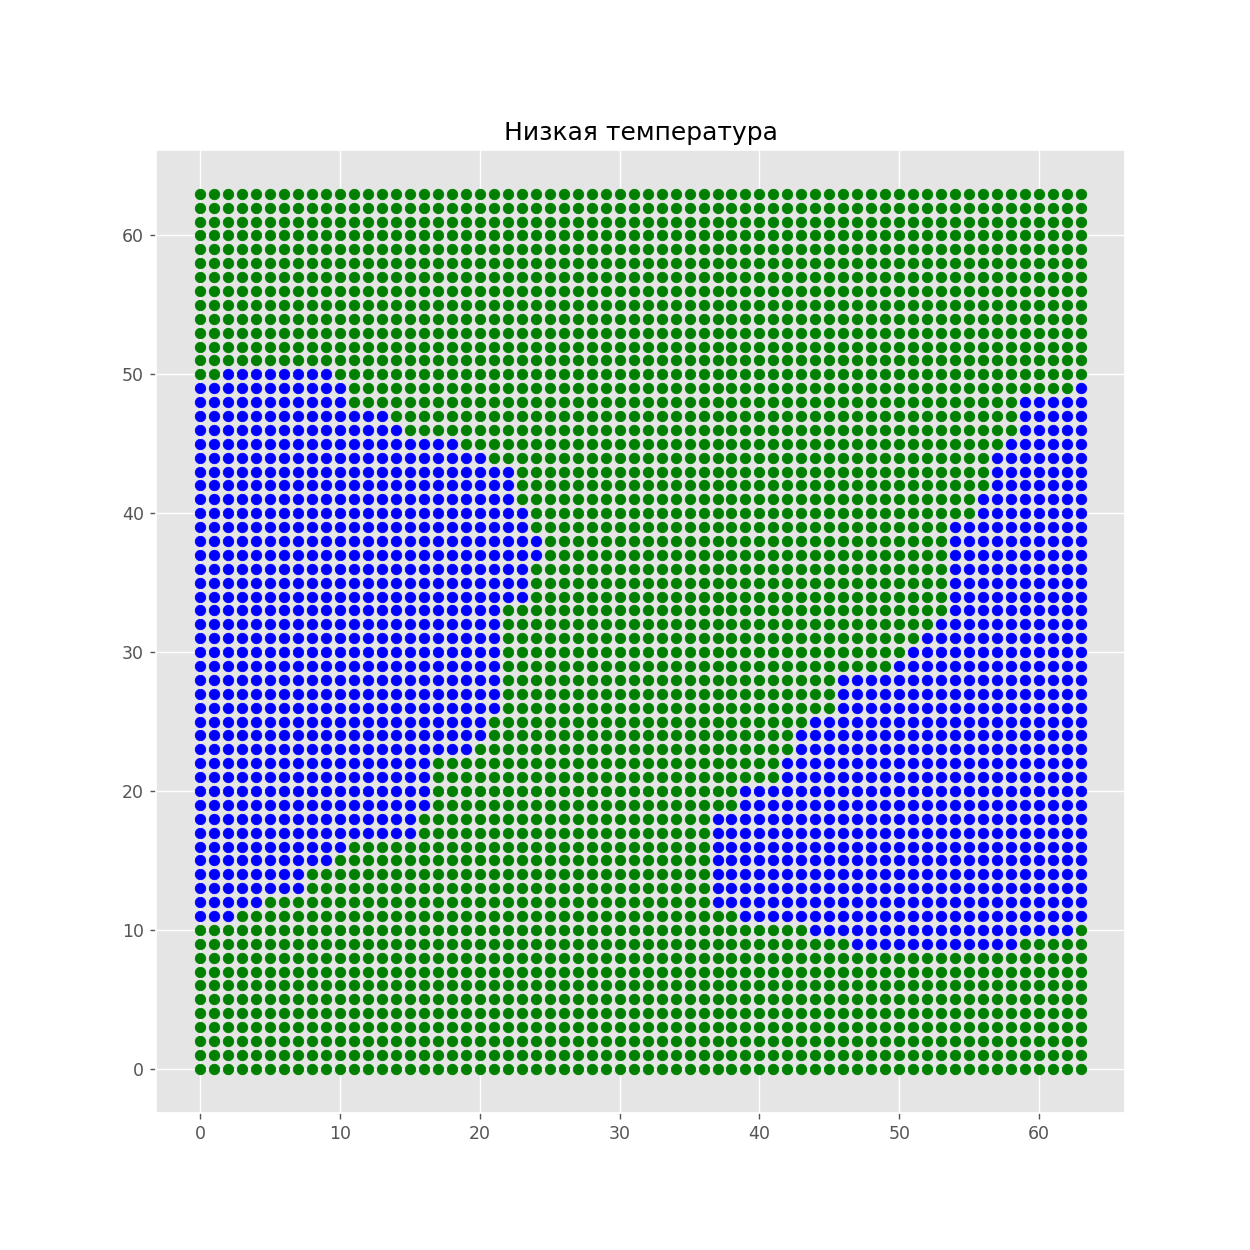

Text(0.5, 1.0, 'Низкая температура')

In [50]:
state_low = state
for i in range(100):
    state_low = makeFlip(0.5, state_low);
plt.figure(figsize=(10,10))
plt.scatter(pos(N, state_low)[0], pos(N, state_low)[1], c="blue")
plt.scatter(neg(N, state_low)[0], neg(N, state_low)[1], c="green")
plt.title("Низкая температура")

<IPython.core.display.Javascript object>


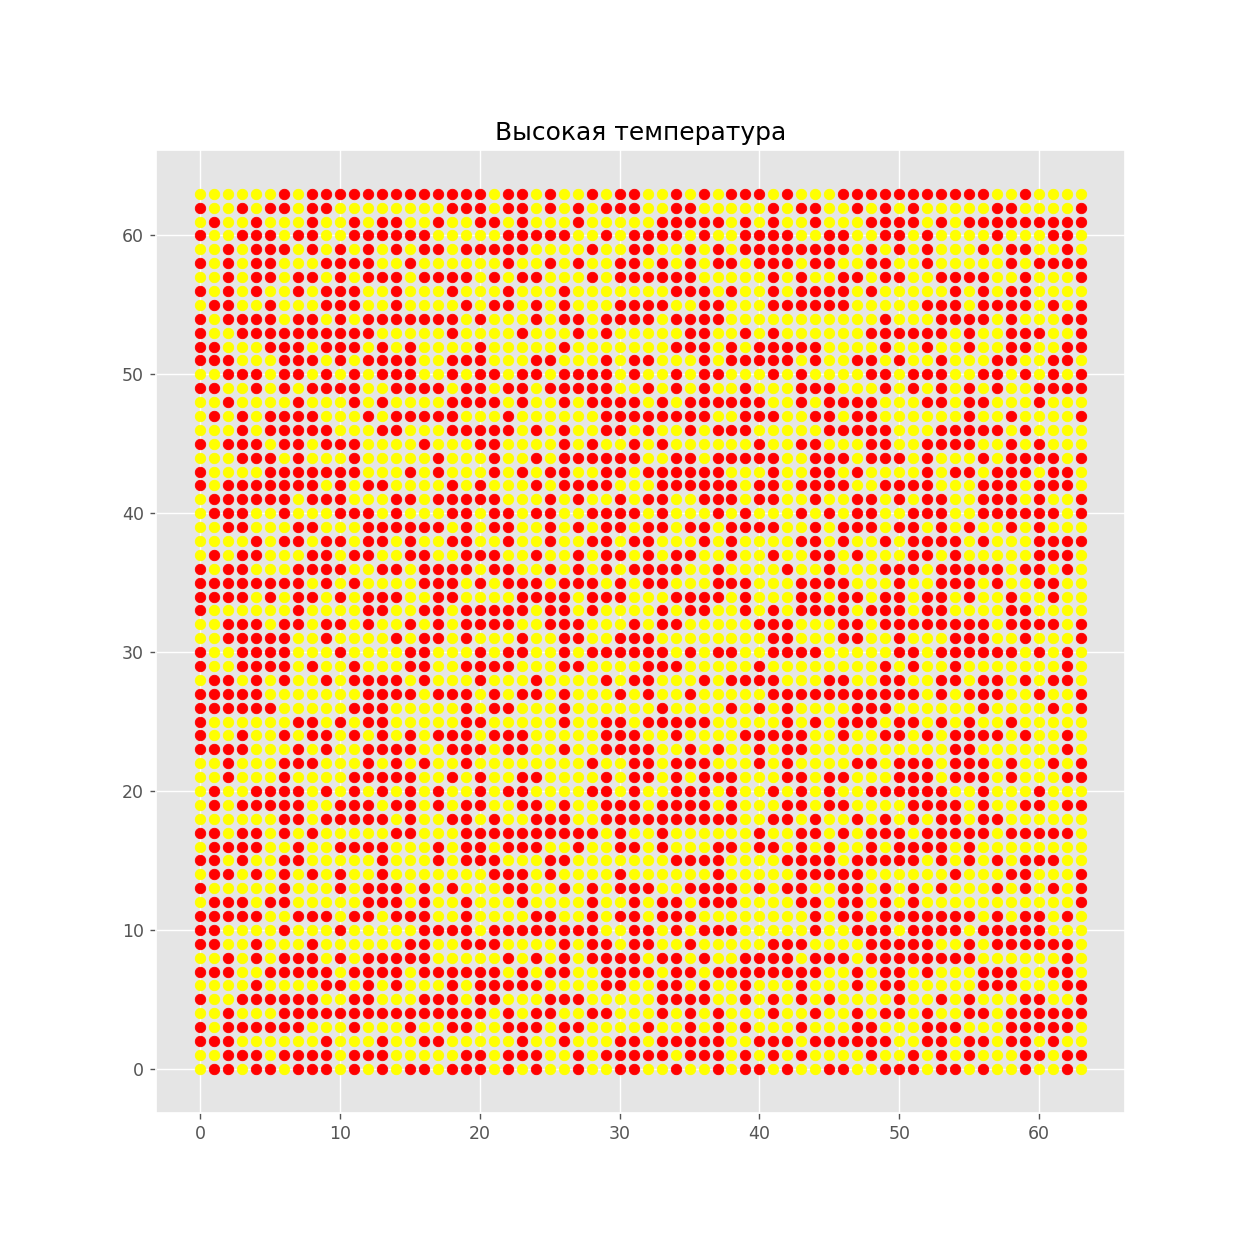

Text(0.5, 1.0, 'Высокая температура')

In [52]:
state_high = state
for i in range(100):
    state_high = makeFlip(50, state_high);

plt.figure(figsize=(10,10))
plt.scatter(pos(N, state_high)[0], pos(N, state_high)[1], c="red")
plt.scatter(neg(N, state_high)[0], neg(N, state_high)[1], c="yellow")
plt.title("Высокая температура")

В случае с низкой температурой можно заметить крупные кластеры одного цвета - одинаковые проекции спина. Эти кластеры и есть доменные структуры ферромагнетика, отражающие намагниченность вещества. При больших температурах кластеров не образуется, проекции спина разные - намагниченности нет.